----бета распределение----
y'(K) = 0.00020317046920464407
----распределение коши----
y'(K) = 0.0002751270474436784
integral: 4.282591586184729


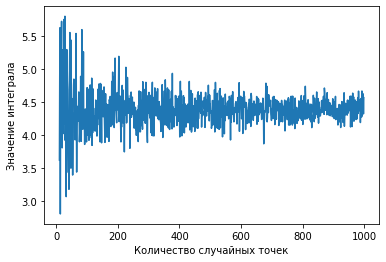

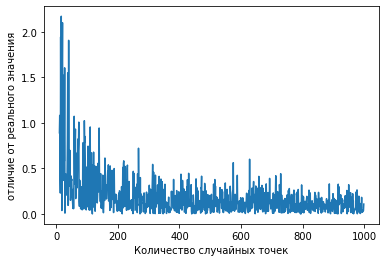

(array([  4.,  11.,  13.,  19.,  39.,  64.,  83., 101., 134., 128., 125.,
         91.,  80.,  45.,  27.,  15.,  14.,   1.,   1.,   5.]),
 array([4.02448078, 4.06395764, 4.10343449, 4.14291134, 4.1823882 ,
        4.22186505, 4.26134191, 4.30081876, 4.34029562, 4.37977247,
        4.41924932, 4.45872618, 4.49820303, 4.53767989, 4.57715674,
        4.6166336 , 4.65611045, 4.6955873 , 4.73506416, 4.77454101,
        4.81401787]),
 <a list of 20 Patch objects>)

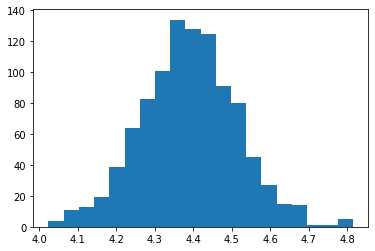

In [11]:
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

N = 1000
M = 2.0 ** 31

def series_test(arr):
    med = np.median(np.sort(arr))
    new_arr = arr[arr != med]
    max_lenth = 1
    lenth = 1
    count = 1
    m = 0
    for i in range(1, new_arr.size):
        if(new_arr[i] < med):
            m+=1
        if new_arr[i] > med and new_arr[i-1] < med or new_arr[i] < med and new_arr[i-1] > med:
            count+=1
    return (count-m-0.5)/((m-1)*m/math.sqrt(2*m-1))

def gamma_distr(a):
    rng = np.random.default_rng()
    for i in range(N):
        sum = 0.0
        for j in range(a):
            sum += np.log(rng.random())
        yield sum*(-1)

def beta_distr(v, w2):
    gamma1 = list(gamma_distr(v))
    gamma2 = list(gamma_distr(w))
    for i in range(N):
        yield gamma1[i]/(gamma1[i]+gamma2[i])

def normal_distr():
    rng1 = np.random.default_rng()
    rng2 = np.random.default_rng()
    for i in range(N):
        yield math.sqrt(-2*np.log(rng1.random()))*math.cos(2*math.pi*rng2.random())

def cauchy_dist():
    normal1 = list(normal_distr())
    normal2 = list(normal_distr())
    for i in range(N):
        yield math.tan(math.pi*(normal1[i]/normal2[i]-0.5))

def f(x):
    return x*x*math.sin(x)*math.sin(x)

def integral(n):
    rng = np.random.default_rng()
    sum = 0.0
    for i in range(n):
        sum += f(rng.random()*math.pi)
    return sum*math.pi/n

v, w = 2, 4
beta_array = np.array(list(beta_distr(v, w)))
# gamma_array = np.array(list(gamma_distr(v)))
cauchy_array = np.array(list(cauchy_dist()))
# mean = v/(v+w)
# theory_var = v*w/((v+w)*(v+w)*(v+w+1))
# actual_mean = beta_array.mean()
# actual_var = beta_array.var()

# print(stats.kstest(stats.gamma.rvs(v, size=N), 'gamma', {v}, N))
# print(stats.kstest(gamma_array, 'gamma', {v}, N))
print('----бета распределение----')
# print(stats.kstest(beta_array, 'beta', {v, w}, N))
print('y\'(K) = {}'.format(np.average(np.array([series_test(np.array(list(beta_distr(v, w)))) for i in range(100)]))))
# print(stats.kstest(stats.beta.rvs(v, w, size=N), 'beta', {v, w}, N))
print('----распределение коши----')
# print(stats.kstest(stats.cauchy.rvs(size=N), 'cauchy', {}, N))
# print(stats.kstest(cauchy_array, 'cauchy', {}, N))
rng = np.random.default_rng()
print('y\'(K) = {}'.format(np.average(np.array([series_test(np.array(list(cauchy_dist()))) for i in range(100)]))))

print('integral: {}'.format(integral(1000)))
x_array = np.arange(10, 1000)
y_array = np.array([integral(x) for x in x_array])
y_array2 = np.array([abs(4.38231461665252 - integral(x)) for x in x_array])
y_array3 = np.array([integral(1000) for i in range(1000)])
plt.xlabel("Количество случайных точек")
plt.ylabel("Значение интеграла")

plt.plot(x_array, y_array)
plt.show()
plt.xlabel("Количество случайных точек")
plt.ylabel("отличие от реального значения")
plt.plot(x_array, y_array2)
plt.show()
plt.hist(y_array3,bins=20)
        